# Social Learning

## The Voter Model

This model of social learning was independently introduced in Clifford and Sudbury (1973), Holley and Liggett (1975). The setting and dynamic process are the following:
* Each agent has its own opinion
* On each iteration a randoly choosen agent chooses its neighbour and adopts its side

It was shown that agents' states reach a consensus over any connected graph $G$ (Coalescing Random Walks).

In [2]:
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

### Task 1

Implement the Voter Model and check how the number of agents' states changes with time.
Run it for Karate club and [Political Blogs](https://www.dropbox.com/s/fj70uuph47hoc3v/polblogs.gml?dl=0) networks.

In [4]:
G = nx.karate_club_graph()
y = range(G.number_of_nodes())

maxIter = 1000
numStates = np.zeros((maxIter,), dtype=int)
path = []

for i in xrange(maxIter):
    numStates[i] = len(np.unique(y))
    agent = np.random.choice(G.nodes())
    adopt = np.random.choice(G.neighbors(agent))
    y[agent] = y[adopt]
    path.append((adopt, agent))
    

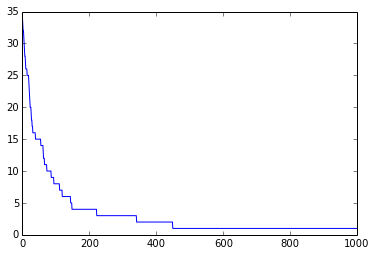

In [6]:
plt.plot(numStates)

In [7]:
numStates[-1]

1

In [8]:
# Some preprocessing for polblogs
A = nx.adj_matrix(nx.read_gml('polblogs.gml'))
G = nx.Graph(A)
for n,d in G.degree_iter():
    if d == 0: 
        G.remove_node(n)

mapping = {}
i = 0
for n in G.nodes_iter():
    mapping[n] = i
    i+=1
G = nx.relabel_nodes(G,mapping)

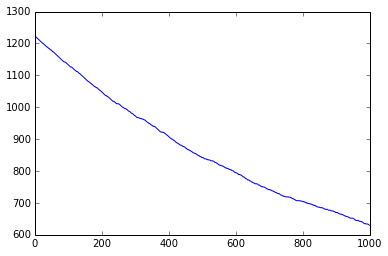

In [10]:
plt.plot(numStates)

### Task 2*

Try to write a code that identifies the path of opinion adoption starting from a particular node 

In [11]:
G = nx.karate_club_graph()
y = range(G.number_of_nodes())

maxIter = 1000
numStates = np.zeros((maxIter,), dtype=int)
path = []

for i in xrange(maxIter):
    numStates[i] = len(np.unique(y))
    agent = np.random.choice(G.nodes())
    adopt = np.random.choice(G.neighbors(agent))
    y[agent] = y[adopt]
    path.append((adopt, agent))


In [20]:
path[0:3]

[(16, 5), (3, 12), (2, 0)]

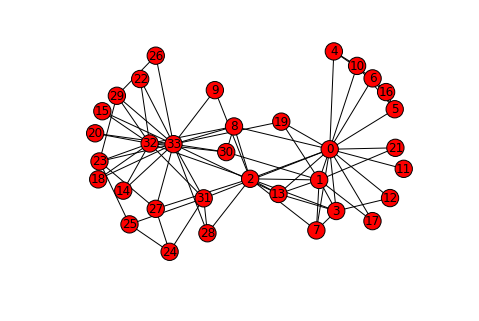

In [23]:
nx.draw(G, with_labels=True)

In [44]:
start = 6

rw = []
time = []
t = 0

for hop in path:
    if hop[0] == start:
        rw.append(hop)
        time.append(t)
        start = hop[1]
    t+=1

In [45]:
pltrw = []
plttime = []

for i in xrange(len(rw)-1):
    pltrw.extend((rw[i][0], rw[i][1], rw[i][1]))
    plttime.extend((time[i], time[i], time[i+1]))

pltrw.extend((rw[-1][0], rw[1][1]))
plttime.extend((time[-1], time[-1]))


In [42]:
pltrw2 = pltrw[:]
plttime2 = plttime[:]

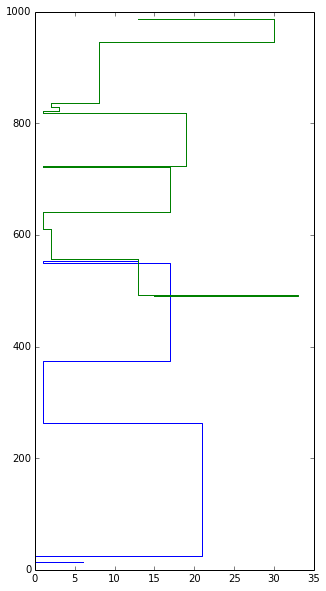

In [46]:
plt.figure(figsize=(5,10))
plt.plot(pltrw, plttime, pltrw2, plttime2)

## References

1. Clifford, P., and A. Sudbury, "A model for spatial conflict", 1973.
2. Holley R and Liggett T M, "Ergodic Theorems for Weakly Interacting Infinite Systems and the Voter Model", 1975.
3. Ercan Yildiz , Daron Acemoglu , Asuman Ozdaglar , Amin Saberi , Anna Scaglione, "Discrete Opinion Dynamics with Stubborn Agents", 2011
4. Abhimanyu Das, Sreenivas Gollapudi, and Kamesh Munagala, "Modeling Opinion Dynamics in Social Networks", 2014
